<center><h1>  Fire Damage Assessment with Sentinel- 3 </h1></center>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
from matplotlib import pyplot as plt # Visualization
import cartopy.crs as ccrs # Projected visualizations
import xarray as xr # Open, read and Process netCDF files
import numpy as np # Data manupulation
import cartopy # improved visualizations
from glob import iglob # data access in file manager
import glob   # data access in file manager
from os.path import join # data access in file manager
import pandas as pd # data manipulation
import imageio # create gif 
import matplotlib.dates as mdates # date manipulation
import matplotlib.patches as mpatches # to define patches (2D artist with a face color and an edge color such as rectangle, circles)
from matplotlib.dates import DateFormatter # date manipulation
import datetime #create datetime object
import time #to manipulate time in Python and create timer

In [2]:
# Define your data directory Rootpath and your filename FName
file_path = 'C:\\WinPython38\\NBR_collocation_20210728_20210809.nc'

In [3]:
NBR_collocate=xr.open_dataset(file_path)
NBR_collocate

<xarray.Dataset>
Dimensions:                                                                                                                       (x: 1664, y: 1154)
Coordinates:
    lat                                                                                                                           (y, x) float64 ...
    lon                                                                                                                           (y, x) float64 ...
Dimensions without coordinates: x, y
Data variables:
    NBR_20210728                                                                                                                  (y, x) float32 ...
    NBR_20210731                                                                                                                  (y, x) float32 ...
    collocationFlags_NBR_20210731_S3A_S3B_SL_1_RBT                                                                                (y, x) int8 ...
    NBR_20210730                                                                                                                  (y, x) float32 ...
    collocationFlags_NBR_20210730_S3A_SL_1_RBT____20210730T075750_20210730T080050_20210731T163142_0179_074_306_2340_LN2_O_NT_004  (y, x) int8 ...
    NBR_20210801                                                                                                                  (y, x) float32 ...
    collocationFlags_NBR_20210801_S3B_SL_1_RBT____20210801T080707_20210801T081007_20210802T200613_0180_055_192_2340_LN2_O_NT_004  (y, x) int8 ...
    NBR_20210729                                                                                                                  (y, x) float32 ...
    collocationFlags_NBR_20210729_S3A_SL_1_RBT____20210729T082401_20210729T082701_20210730T164959_0179_074_292_2340_LN2_O_NT_004  (y, x) int8 ...
    NBR_20210803                                                                                                                  (y, x) float32 ...
    collocationFlags_NBR_20210803_S3A_SL_1_RBT____20210803T075405_20210803T075705_20210804T193303_0179_074_363_2340_LN2_O_NT_004  (y, x) int8 ...
    NBR_20210804                                                                                                                  (y, x) float32 ...
    collocationFlags_NBR_20210804_S3B_SL_1_RBT____20210804T082933_20210804T083233_20210805T192129_0179_055_235_2340_LN2_O_NT_004  (y, x) int8 ...
    NBR_20210802                                                                                                                  (y, x) float32 ...
    collocationFlags_NBR_20210802_S3A_SL_1_RBT____20210802T082016_20210802T082316_20210803T171626_0179_074_349_2340_LN2_O_NT_004  (y, x) int8 ...
    NBR_20210805                                                                                                                  (y, x) float32 ...
    collocationFlags_NBR_20210805_S3B_SL_1_RBT____20210805T080323_20210805T080623_20210806T164116_0179_055_249_2340_LN2_O_NT_004  (y, x) int8 ...
    NBR_20210806                                                                                                                  (y, x) float32 ...
    collocationFlags_NBR_20210806_S3A_SL_1_RBT____20210806T081630_20210806T081930_20210807T160928_0179_075_021_2340_LN2_O_NT_004  (y, x) int8 ...
    NBR_20210808                                                                                                                  (y, x) float32 ...
    collocationFlags_NBR_20210808_S3B_SL_1_RBT____20210808T082549_20210808T082849_20210809T202332_0180_055_292_2340_LN2_O_NT_004  (y, x) int8 ...
    NBR_20210809                                                                                                                  (y, x) float32 ...
    collocationFlags_NBR_20210809_S3B_SL_1_RBT____20210809T075938_20210809T080238_20210810T195015_0179_055_306_2340_LN2_O_NT_004  (y, x) int8 ...
    NBR_20210807                                                            

In [4]:
#Time dimension
#Create the date vector to loop on the files
dt = datetime.datetime(2021, 7, 29) #initialize dt at the first day after the reference date
end = datetime.datetime(2021, 8, 9) #our time period stops on 09/08/2021
step = datetime.timedelta(days=1) #set the timedelta to one day #time step
dates = [] #initialize an empty array for dates
dates_title=[] #initialize an empty array for dates_title
while dt <= end: 
    dates.append(dt.strftime('%Y%m%d')) #Add the current day to the dates array
    dates_title.append(dt.strftime('%d/%m/%Y')) #Add the current day to the dates_title array
    dt += step #jump to the next day
#Display the date vector    
dates

['20210729',
 '20210730',
 '20210731',
 '20210801',
 '20210802',
 '20210803',
 '20210804',
 '20210805',
 '20210806',
 '20210807',
 '20210808',
 '20210809']

In [5]:
#Display date_title
dates_title

['29/07/2021',
 '30/07/2021',
 '31/07/2021',
 '01/08/2021',
 '02/08/2021',
 '03/08/2021',
 '04/08/2021',
 '05/08/2021',
 '06/08/2021',
 '07/08/2021',
 '08/08/2021',
 '09/08/2021']

In [6]:
#Define the reference date (you can change it later on if you wish to
ref_date='20210728'
#for loop on the dates list
for date in dates:
    #dNBR computation wrt NBR values for the ref_date
    NBR_collocate=NBR_collocate.assign(dNBR=NBR_collocate['NBR_{}'.format(ref_date)]-NBR_collocate['NBR_{}'.format(date)])
    #RBR computation wrt NBR values for the ref_date
    NBR_collocate=NBR_collocate.assign(RBR=NBR_collocate['dNBR']/(NBR_collocate['NBR_{}'.format(ref_date)]+1.001))
    #RBR is computed, drop the dNBR and NBR_date variables
    NBR_collocate=NBR_collocate.drop(['dNBR','NBR_{}'.format(date)])
    #Rename the variables with the current date
    NBR_collocate=NBR_collocate.rename({'RBR':'RBR_{}_{}'.format(ref_date,date)})

#drop the collocationFlags and the NBR_ref_date
keys_to_drop=list(NBR_collocate.keys())
keys=list(NBR_collocate.keys())
for key in keys:
    if key.startswith('RBR_'):
        keys_to_drop.remove(key)
        
NBR_collocate=NBR_collocate.drop(keys_to_drop)

In [7]:
# Display the DataSet 'NBR_collocate'
NBR_collocate

<xarray.Dataset>
Dimensions:                (x: 1664, y: 1154)
Coordinates:
    lat                    (y, x) float64 ...
    lon                    (y, x) float64 ...
Dimensions without coordinates: x, y
Data variables:
    RBR_20210728_20210729  (y, x) float32 nan nan nan nan ... nan nan nan nan
    RBR_20210728_20210730  (y, x) float32 nan nan nan nan ... nan nan nan nan
    RBR_20210728_20210731  (y, x) float32 nan nan nan nan ... nan nan nan nan
    RBR_20210728_20210801  (y, x) float32 nan nan nan nan ... nan nan nan nan
    RBR_20210728_20210802  (y, x) float32 nan nan nan nan ... nan nan nan nan
    RBR_20210728_20210803  (y, x) float32 nan nan nan nan ... nan nan nan nan
    RBR_20210728_20210804  (y, x) float32 nan nan nan nan ... nan nan nan nan
    RBR_20210728_20210805  (y, x) float32 nan nan nan nan ... nan nan nan nan
    RBR_20210728_20210806  (y, x) float32 nan nan nan nan ... nan nan nan nan
    RBR_20210728_20210807  (y, x) float32 nan nan nan nan ... nan nan nan nan
    RBR_20210728_20210808  (y, x) float32 nan nan nan nan ... nan nan nan nan
    RBR_20210728_20210809  (y, x) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    Conventions:  CF-1.4
    TileSize:     580:416
    start_date:   28-JUL-2021 08:12:07.473210
    stop_date:    28-JUL-2021 08:12:07.473210

In [8]:
def subplot_region(data:xr.DataArray,ax:plt.subplot,lon_min:float,lon_max:float,lat_min:float,lat_max:float,color:str):
    """
    Creates a contour plot of the RBR computed from S3 L1B products. The color levels are defined within the function. 
    Args:
        (xarray_dataarray) data, RBR from S3 L1B (it must have 'lon' and 'lat' as coordinates)
        (subplot) ax, supblot instance with a defined projection
        (float) lon_min,lon_max,lat_min,lat_max: coordinates of the area of interest
        (str) color: color of the plot frame
    Returns:
        (subplot) contourf plot of the RBR over the specified region
    """
    # RBR levels and associated colors for the contour plot, feel free to change them if needed
    level=[-0.500,-0.250,-0.100,0.130,0.270,0.440,0.660,1.300]
    colors=['b','c','forestgreen','y','orange','r','m']
    
    im=data.plot.contourf(ax=ax, x='lon', y='lat',\
                          add_colorbar=False, extend='neither', colors=colors, transform=ccrs.PlateCarree(), levels=level)
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
    #Define the subplot frame colour and linewidth
    ax.outline_patch.set_edgecolor(color)
    ax.outline_patch.set_linewidth(3)
    ax.coastlines('10m',linewidth=2)
    ax.gridlines
    return ax

In [8]:
#Coordinates of the global area of interest (Southern Turkey)
lon_min,lon_max=27.6,34
lat_min,lat_max=35.8,37.8

#Coordinates of the south western area affected by wildfires
lon_min_west,lon_max_west=27.65,29
lat_min_west,lat_max_west=36.3,37.6

#Coordinates of the south central area affected by wildfires
lon_min_centre,lon_max_centre=31.1,32.2
lat_min_centre,lat_max_centre=36.5,37.5

#Coordinates of the south eastern area affected by wildfires
lon_min_east,lon_max_east=32.75,33.9
lat_min_east,lat_max_east=35.85,36.85


# RBR levels and associated colors for the contour plot
level=[-0.500,-0.250,-0.100,0.130,0.270,0.440,0.660,1.300]
colors=['b','c','forestgreen','y','orange','r','m']


Visualisation of the burned area over Turkey

In [ ]:
#loop on the days to automate the figure generation
for date,date_title in zip(dates,dates_title):

    #Figure initialisation
    fig,ax=plt.subplots(1,1,figsize=(25,40)) #2 lines, 3 columns 
    #ax0 on the first line, will hold the global area of interest with the cartopy Plate Carree projection
    ax0=plt.subplot(2,1,1,projection=ccrs.PlateCarree())

    # RBR contour plot of the global area of interest
    im0=NBR_collocate['RBR_{}_{}'.format(ref_date,date)].plot.contourf(ax=ax0, x='lon', y='lat',\
                                                                   add_colorbar=False, extend='neither',\
                                                                   colors=colors, transform=ccrs.PlateCarree(), levels=level)
    #Set the extent of the subplot to the area of interest
    ax0.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
    #add coastlines
    ax0.coastlines('10m',linewidth=2)
    #add gridlines
    gl0=ax0.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='gray', alpha=0.5,)
    gl0.xlabels_top = False
    gl0.ylabels_left = False
    #Add three rectangles over the smaller areas of interest
    #South East area = red
    ax0.add_patch(mpatches.Rectangle(xy=[lon_min_east, lat_min_east], 
                                      width=lon_max_east-lon_min_east, height=lat_max_east-lat_min_east, 
                                      edgecolor='red', facecolor='None', linewidth=2,
                                      transform=ccrs.PlateCarree()))
    #South central area = blue
    ax0.add_patch(mpatches.Rectangle(xy=[lon_min_centre, lat_min_centre], 
                                      width=lon_max_centre-lon_min_centre, height=lat_max_centre-lat_min_centre, 
                                      edgecolor='blue', facecolor='None', linewidth=2,
                                      transform=ccrs.PlateCarree()))
    #South West area = indigo
    ax0.add_patch(mpatches.Rectangle(xy=[lon_min_west, lat_min_west], 
                                      width=lon_max_west-lon_min_west, height=lat_max_west-lat_min_west, 
                                      edgecolor='indigo', facecolor='None', linewidth=2,
                                      transform=ccrs.PlateCarree()))
    
    #Title definition
    #title='RBR values between {} and {}'.format(ref_date_title,date_title)
    title='Burned area extent and severity on {}'.format(date_title)
    fig.suptitle(title,fontsize=35,y=0.62)
    
    #colour bar definition
    #color bar will be associated to the main plot, horizontally positioned
    cbar=fig.colorbar(im0, ax=ax0, pad=0.1, format='%.2f', orientation="horizontal", shrink=0.8)
    cbar.ax.tick_params(labelsize=20)
    cbar.set_label(label='Burn severity level',fontsize=25)
    # Write class names within the color bar
    cbar.ax.get_yaxis().set_ticks([])
    j=0
    classes=['High regrowth', 'Low regrowth', 'Unburned', 'Low severity', 'Moderate - low severity',\
             'Moderate - high severity', 'High severity']
    for legend in classes:
        cbar.ax.text((2 * j + 1) / 14, .5, legend, ha='center', va='center', fontsize=12, transform=cbar.ax.transAxes)
        j+=1

    fig.subplots_adjust(wspace=0.05,hspace=0.01,top=0.6)


    # Saving the fig
    plt.savefig('C:\\WinPython38\\RBR_{}_{}.png'.format(ref_date,date),\
                facecolor='white', bbox_inches='tight', dpi=300)    
    # to avoid seeing all images
    #plt.close()

Animation of the burned area extent evolution

In [10]:
# modules
import imageio
from pathlib import Path
from IPython.display import Image

In [11]:
# Search image files
image_path = Path('C:\\WinPython38\\WPy64-3870\\notebooks\\Fire_Turkey_1021\\Processing\\S3_SL_1\\figures\\')
images = sorted(glob.glob(join(image_path,'RBR_*.png')))
image_list = []
for file_name in images:
    image_list.append(imageio.imread(file_name))

In [12]:
# Save the GIF
imageio.mimwrite('C:\\WinPython38\\animated_RBR.gif', image_list,duration=2,loop=2)

In [ ]:
## Visualisation
with open('C:\\WinPython38\\animated_RBR.gif','rb') as f:
    display(Image(data=f.read(), format='png'))

In [15]:
#Burned area time series computation

#empty list creation to store the number of pixels having RBR>0.13 for each day and to compute the burned area
counts=[]
areas=[]
#mask to further restrict the area of interest to South Turkey as this is where the main fires broke out
mask_area = (
    (NBR_collocate['lon'] >= 27)
    & (NBR_collocate['lon'] <= 34)
    & (NBR_collocate['lat']>=35.85)
    & (NBR_collocate['lat']<=37.6)
    )
#Select the pixels satisfying the mask conditions
interest=NBR_collocate.where(mask_area,np.nan)
#Loop over the dates
for date in dates:
    #Filtered will be set to NaN if RBR<0.13 and to the RBR value if RBR>=0.13
    filtered=interest['RBR_{}_{}'.format(ref_date,date)].where(interest['RBR_{}_{}'.format(ref_date,date)]>=0.13,np.nan)
    #Number of non NaN pixels in filterd
    count=filtered.count()
    counts.append(int(count.values))
    #SLSTR has a ground resolution of 500m so each pixel roughly covers 0.025km²
    area=count*0.5*0.5
    areas.append(float(area.values))

In [16]:
#Display the daily burnt areas 
areas

[737.0,
 861.5,
 1139.25,
 924.25,
 1224.0,
 1197.25,
 1105.5,
 1456.75,
 1576.25,
 735.25,
 1324.5,
 1350.75]

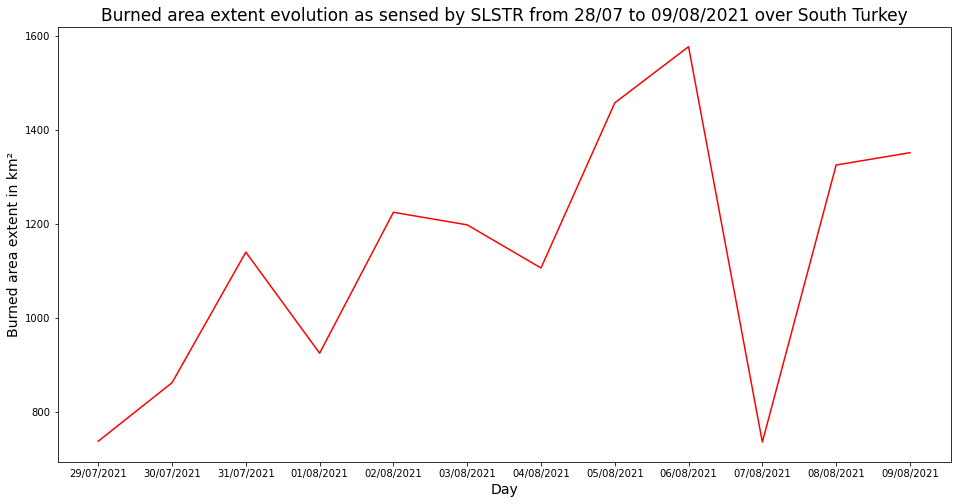

In [17]:
#Plot the burned area evolution in km²

fig,axe=plt.subplots(1,1, figsize=(16,8))
axe.plot(dates_title,areas, 'red')
axe.set_ylabel('Burned area extent in km²', fontsize=14)
axe.set_xlabel('Day', fontsize=14)
axe.set_title('Burned area extent evolution as sensed by SLSTR from 28/07 to 09/08/2021 over South Turkey',fontsize=17) # add title
# Save the plot
plt.savefig('/shared/Fire_Turkey_1021/Processing/S3_SL_1/figures/Burned_area_time_series.png', facecolor='white',\
            bbox_inches='tight', dpi=300)

# Sentinel 5 
# UV Absorbing aerosol index
# Please remember that this part of code is seperate notebook (Linux environment)


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import os
from matplotlib import pyplot as plt # Visualization
import cartopy.crs as ccrs # Projected visualizations
import xarray as xr # Open, read and Process netCDF files
import numpy as np # Data manupulation
import cartopy # improved visualizations
from glob import iglob # data access in file manager
import glob   # data access in file manager
from os.path import join # data access in file manager
import pandas as pd # data manipulation
import harp #Python interface of the atmospheric toolbox to open read and process Sentinel-5P products
import imageio # create gif 
import matplotlib.dates as mdates # date manipulation
import matplotlib.patches as mpatches # to define patches (2D artist with a face color and an edge color such as rectangle, circles)
from matplotlib.dates import DateFormatter # date manipulation
import datetime #create datetime object
import time #to manipulate time in Python and create timer

In [21]:
#Sentinel 5 
# UV Absorbing aerosol index
# Command line to download data
!/shared/Fire_Turkey_1021/Aux/dhusget.sh \
-d 'https://s5phub.copernicus.eu/dhus' \
-u 's5pguest' -p 's5pguest' \
-m 'Sentinel-5' \
-S 2021-07-29T00:00:00.000Z -E 2021-07-29T23:59:00.000Z \
-F 'platformname:Sentinel-5 AND producttype:L2__AER_AI AND processinglevel:L2 AND processingmode:Offline' \
-l 100 \
-c 22,40:37,29 \
-q ../Original/S5P_AER_AI/automatic_download/search_result_`date +%d%m%y`_S5P.xml \
-C ../Original/S5P_AER_AI/automatic_download/products_list_`date +%d%m%y`_S5P.csv \
-O '../Original/S5P_AER_AI/automatic_download/' \
-o 'product'

/shared/Fire_Turkey_1021/Aux/dhusget.sh: line 214: export: add_offline_product_to_list: not a function


dhusget version: 0.3.8

USAGE: dhusget.sh [LOGIN OPTIONS]... [SEARCH QUERY OPTIONS]... [SEARCH RESULT OPTIONS]... [DOWNLOAD OPTIONS]... 

Type 'dhusget.sh -help' for usage information

LOGIN

Specified Data Hub Service URL is:
https://s5phub.copernicus.eu/dhus


SEARCH QUERY OPTIONS

'-m option' mission is set to Sentinel-5. 

'-i option' not specified. Search is performed on all available instruments.

 Ingestion date options not specified ('-t', '-s', '-e').  

'-S option' and '-E option' are set to 2021-07-29T00:00:00.000Z and 2021-07-29T23:59:00.000Z. Search for all products having sensing date included in [2021-07-29T00:00:00.000Z,2021-07-29T23:59:00.000Z]. 

'-c option' is set to 22,40:37,29. Search is performed on an Area of interest defined as a bounding box delimited by the two opposite vertices P1=[lon1=22,lat1=40] and P2=[lon2=37,lat2=29]. 

'-T option' not specified. Sea

In [22]:
Fname='/shared/Fire_Turkey_1021/Original/S5P_AER_AI/S5P_OFFL_L2__AER_AI_20210809T094347_20210809T112517_19806_02_020200_20210810T232914.nc'
aerosol=xr.open_dataset(Fname,group='PRODUCT')

In [23]:
aerosol

<xarray.Dataset>
Dimensions:                          (scanline: 4173, ground_pixel: 450, time: 1, corner: 4)
Coordinates:
  * scanline                         (scanline) float64 0.0 1.0 ... 4.172e+03
  * ground_pixel                     (ground_pixel) float64 0.0 1.0 ... 449.0
  * time                             (time) datetime64[ns] 2021-08-09
  * corner                           (corner) float64 0.0 1.0 2.0 3.0
    latitude                         (time, scanline, ground_pixel) float32 ...
    longitude                        (time, scanline, ground_pixel) float32 ...
Data variables:
    delta_time                       (time, scanline) datetime64[ns] ...
    time_utc                         (time, scanline) object ...
    qa_value                         (time, scanline, ground_pixel) float32 ...
    aerosol_index_354_388            (time, scanline, ground_pixel) float32 ...
    aerosol_index_340_380            (time, scanline, ground_pixel) float32 ...
    aerosol_index_354_388_precision  (time, scanline, ground_pixel) float32 ...
    aerosol_index_340_380_precision  (time, scanline, ground_pixel) float32 ...

In [24]:
input_path='/shared/Fire_Turkey_1021/Original/S5P_AER_AI/'
export_path='/shared/Fire_Turkey_1021/Processing/S5P_AER_AI/pre_processing_files/'

# the function `list` recovers the name of all files in the input_path folder
list_files = sorted(os.listdir(input_path))

# Get the name of all files in the folder and sort them in alphabetic order
files_input= sorted(glob.glob(join(input_path, 'S5P_OFFL_*.nc')))

# Make sure that list_files contains only S5P files (if the input directory contains other files)
for file in list_files:
    if file.startswith("S5P_OFFL_")==False:
        list_files.remove(file)
        
#Starting time of the preprocessing
t0 = time.time()

#Pre-processing loop on each file in input_path to get rid of unnecessary variables (keep()) and crop to our ROI
for i in range(len(files_input)):
    #Pre-processing
    Converted_AER=harp.import_product(files_input[i], \
            operations= "latitude <= 40[degree_north]; latitude >= 29[degree_north]; \
            longitude <= 38 [degree_east]; longitude >= 22 [degree_east]; \
            keep(latitude,latitude_bounds,longitude,longitude_bounds, \
            absorbing_aerosol_index,absorbing_aerosol_index_validity,datetime_start)")
    #Export of the preprocessed file to export_path
    harp.export_product(Converted_AER, join(export_path, list_files[i]),file_format="netcdf") 
    print("product", os.path.basename(files_input[i]),"pre-processed")
#End time of the pre-precessing
t1 = time.time()

pre_processing_time = t1-t0

print("Pre-processing time: {} seconds".format(pre_processing_time))

product S5P_OFFL_L2__AER_AI_20210728T082829_20210728T100959_19635_02_020200_20210729T221400.nc pre-processed
product S5P_OFFL_L2__AER_AI_20210728T100959_20210728T115129_19636_02_020200_20210729T235402.nc pre-processed
product S5P_OFFL_L2__AER_AI_20210729T095053_20210729T113223_19650_02_020200_20210730T233452.nc pre-processed
product S5P_OFFL_L2__AER_AI_20210729T113223_20210729T131353_19651_02_020200_20210731T011525.nc pre-processed
product S5P_OFFL_L2__AER_AI_20210730T093148_20210730T111317_19664_02_020200_20210731T231547.nc pre-processed
product S5P_OFFL_L2__AER_AI_20210730T111317_20210730T125447_19665_02_020200_20210801T005621.nc pre-processed
product S5P_OFFL_L2__AER_AI_20210731T091242_20210731T105412_19678_02_020200_20210801T225642.nc pre-processed
product S5P_OFFL_L2__AER_AI_20210731T105412_20210731T123541_19679_02_020200_20210802T003714.nc pre-processed
product S5P_OFFL_L2__AER_AI_20210801T085336_20210801T103506_19692_02_020200_20210802T223732.nc pre-processed
product S5P_OFFL_L2

Now let's merge together the pre-processed files and create daily files.

In [25]:
# generated daily converted file
t0 = time.time()

for date in dates:
    # Specify input and output of harp.import_product
    #All S5P L2 AERSOL product for one day
    input_files='/shared/Fire_Turkey_1021/Processing/S5P_AER_AI/pre_processing_files/S5P_OFFL_L2__AER_AI_{}*.nc'.format(date)
    #NetCDF file where merged product will be stored
    export_file='/shared/Fire_Turkey_1021/Processing/S5P_AER_AI/daily_files/S5P_daily__AER_AI_{}.nc'.format(date) 


    #Merging of the pre-processed files
    Converted_AER = harp.import_product(input_files, \
                          operations= "latitude <= 40[degree_north]; latitude >= 29[degree_north]; \
                          longitude <= 38 [degree_east]; longitude >= 22 [degree_east]; \
                          absorbing_aerosol_index_validity>50; \
                          bin_spatial(550,29, 0.02, 800, 22, 0.02); \
                          derive(latitude {latitude}); derive(longitude {longitude}); \
                          keep(latitude,longitude,absorbing_aerosol_index,weight)", \
                          post_operations="bin(); squash(time, (latitude,longitude,absorbing_aerosol_index))"                   
                          )
    #Export of the merged file        
    harp.export_product(Converted_AER, export_file,file_format="netcdf")
    print("product", os.path.basename(export_file),"exported")
    
#End time of the processing
t1 = time.time()

processing_time = t1-t0

#Total processing time accounts for the preprocessing time and the actual merging
total_processing_time=pre_processing_time+processing_time

print("Processing time: {} seconds".format(processing_time))
print("Total processing time: {} seconds".format(total_processing_time))

product S5P_daily__AER_AI_20210729.nc exported
product S5P_daily__AER_AI_20210730.nc exported
product S5P_daily__AER_AI_20210731.nc exported
product S5P_daily__AER_AI_20210801.nc exported
product S5P_daily__AER_AI_20210802.nc exported
product S5P_daily__AER_AI_20210803.nc exported
product S5P_daily__AER_AI_20210804.nc exported
product S5P_daily__AER_AI_20210805.nc exported
product S5P_daily__AER_AI_20210806.nc exported
product S5P_daily__AER_AI_20210807.nc exported
product S5P_daily__AER_AI_20210808.nc exported
product S5P_daily__AER_AI_20210809.nc exported
Processing time: 3.271737575531006 seconds
Total processing time: 24.450544118881226 seconds


In [26]:
# group all file in variable
converted_files=sorted(glob.glob(join('/shared/Fire_Turkey_1021/Processing/S5P_AER_AI/daily_files/', 'S5P_daily__AER_AI_2021*.nc')))
#Check the content of converted_files
converted_files

['/shared/Fire_Turkey_1021/Processing/S5P_AER_AI/daily_files/S5P_daily__AER_AI_20210729.nc',
 '/shared/Fire_Turkey_1021/Processing/S5P_AER_AI/daily_files/S5P_daily__AER_AI_20210730.nc',
 '/shared/Fire_Turkey_1021/Processing/S5P_AER_AI/daily_files/S5P_daily__AER_AI_20210731.nc',
 '/shared/Fire_Turkey_1021/Processing/S5P_AER_AI/daily_files/S5P_daily__AER_AI_20210801.nc',
 '/shared/Fire_Turkey_1021/Processing/S5P_AER_AI/daily_files/S5P_daily__AER_AI_20210802.nc',
 '/shared/Fire_Turkey_1021/Processing/S5P_AER_AI/daily_files/S5P_daily__AER_AI_20210803.nc',
 '/shared/Fire_Turkey_1021/Processing/S5P_AER_AI/daily_files/S5P_daily__AER_AI_20210804.nc',
 '/shared/Fire_Turkey_1021/Processing/S5P_AER_AI/daily_files/S5P_daily__AER_AI_20210805.nc',
 '/shared/Fire_Turkey_1021/Processing/S5P_AER_AI/daily_files/S5P_daily__AER_AI_20210806.nc',
 '/shared/Fire_Turkey_1021/Processing/S5P_AER_AI/daily_files/S5P_daily__AER_AI_20210807.nc',
 '/shared/Fire_Turkey_1021/Processing/S5P_AER_AI/daily_files/S5P_daily

We check the content of the converted file , here the first file:

In [27]:
xr.open_dataset(converted_files[0])  #[0] indicates that we select the first path of the variable: converted_files

<xarray.Dataset>
Dimensions:                  (latitude: 549, longitude: 799, time: 1)
Coordinates:
  * latitude                 (latitude) float64 29.01 29.03 ... 39.95 39.97
  * longitude                (longitude) float64 22.01 22.03 ... 37.95 37.97
Dimensions without coordinates: time
Data variables:
    absorbing_aerosol_index  (latitude, longitude) float64 ...
    weight                   (time, latitude, longitude) float32 ...
    latitude_weight          (time, latitude) float32 ...
    longitude_weight         (time, longitude) float32 ...
    count                    (time) int32 ...
Attributes:
    Conventions:  HARP-1.0
    history:      2021-10-28T14:35:59Z [harp-1.13] harp.import_product('/shar...

In [28]:
# parameter setting
level_aerosol=[1.25,1.5,1.75,2,2.25,2.5,2.75,3]

In [29]:
# A loop on the number of day 
for i in range(len(converted_files)):
    # we open the netcdf file and save data in variables 
    FIn=xr.open_dataset(converted_files[i])

    
    # we define the figure 
    fig=plt.figure(figsize=(16,16))
    axe1 = plt.subplot(projection=ccrs.PlateCarree())
    t=FIn.absorbing_aerosol_index.plot.contourf(ax=axe1, x='longitude', y='latitude', \
                                add_colorbar=False, extend='max', cmap='Purples', transform=ccrs.PlateCarree(), levels=level_aerosol)
    
    # Figure settings
    axe1.set_title('S-5p UV Absorbing Aerosol Index {}'.format(dates_title[i]), fontsize=25)
    axe1.add_feature(cartopy.feature.LAND, edgecolor='black')
    axe1.add_feature(cartopy.feature.RIVERS,edgecolor='black')
    axe1.coastlines('10m')
    axe1.gridlines()
    plt.colorbar(t,shrink=0.6,pad=0)
    
    # save the figures
    plt.savefig('/shared/Fire_Turkey_1021/Processing/S5P_AER_AI/figures/AEROSOL__{}.png'.format(dates[i]), bbox_inches='tight', dpi=100)
    print("figure for", dates[i],"generated")
    # do not display figures
    plt.close()

figure for 20210729 generated
figure for 20210730 generated
figure for 20210731 generated
figure for 20210801 generated
figure for 20210802 generated
figure for 20210803 generated
figure for 20210804 generated
figure for 20210805 generated
figure for 20210806 generated
figure for 20210807 generated
figure for 20210808 generated
figure for 20210809 generated


In [30]:
# Search image files
image_path = Path('/shared/Fire_Turkey_1021/Processing/S5P_AER_AI/figures/')
images = sorted(glob.glob(join(image_path,'AEROSOL_*.png')))
image_list = []
for file_name in images:
    image_list.append(imageio.imread(file_name))

The following cell displays the content of the variable `images` to verify that files are in the right order:

In [31]:
images

['/shared/Fire_Turkey_1021/Processing/S5P_AER_AI/figures/AEROSOL__20210729.png',
 '/shared/Fire_Turkey_1021/Processing/S5P_AER_AI/figures/AEROSOL__20210730.png',
 '/shared/Fire_Turkey_1021/Processing/S5P_AER_AI/figures/AEROSOL__20210731.png',
 '/shared/Fire_Turkey_1021/Processing/S5P_AER_AI/figures/AEROSOL__20210801.png',
 '/shared/Fire_Turkey_1021/Processing/S5P_AER_AI/figures/AEROSOL__20210802.png',
 '/shared/Fire_Turkey_1021/Processing/S5P_AER_AI/figures/AEROSOL__20210803.png',
 '/shared/Fire_Turkey_1021/Processing/S5P_AER_AI/figures/AEROSOL__20210804.png',
 '/shared/Fire_Turkey_1021/Processing/S5P_AER_AI/figures/AEROSOL__20210805.png',
 '/shared/Fire_Turkey_1021/Processing/S5P_AER_AI/figures/AEROSOL__20210806.png',
 '/shared/Fire_Turkey_1021/Processing/S5P_AER_AI/figures/AEROSOL__20210807.png',
 '/shared/Fire_Turkey_1021/Processing/S5P_AER_AI/figures/AEROSOL__20210808.png',
 '/shared/Fire_Turkey_1021/Processing/S5P_AER_AI/figures/AEROSOL__20210809.png']

In [32]:
# Save the GIF
imageio.mimwrite('/shared/Fire_Turkey_1021/Processing/S5P_AER_AI/figures/animated_aerosol.gif', image_list,duration=1,loop=5)

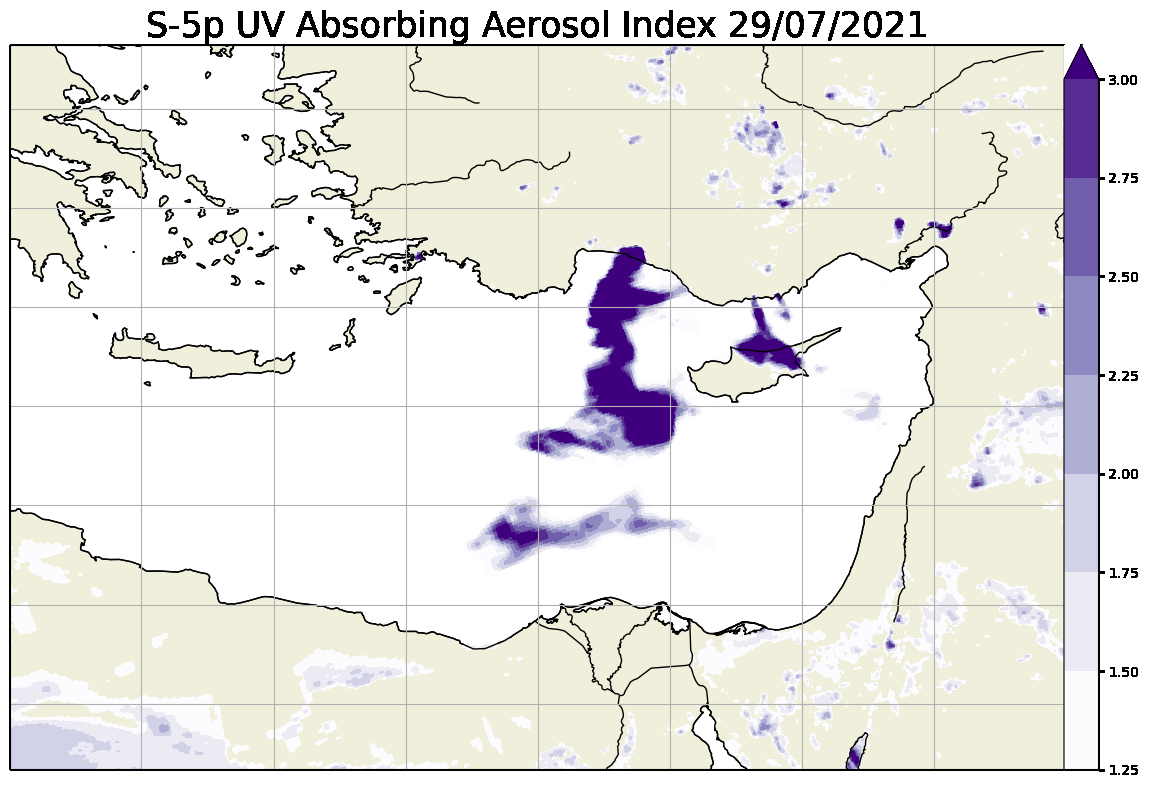

In [33]:
## Visualisation
with open('/shared/Fire_Turkey_1021/Processing/S5P_AER_AI/figures/animated_aerosol.gif','rb') as f:
    display(Image(data=f.read(), format='png'))